In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("loan_data.csv")
df= data.copy()

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)

No of row =  45000
No of col =  14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
data = data.dropna()

In [7]:
data.shape

(45000, 14)

In [8]:
df['person_gender']

0        female
1        female
2        female
3        female
4          male
          ...  
44995      male
44996    female
44997      male
44998      male
44999      male
Name: person_gender, Length: 45000, dtype: object

In [9]:
df['person_gender']=df['person_gender'].map({'female':0, 'male':1})
df['person_gender']

0        0
1        0
2        0
3        0
4        1
        ..
44995    1
44996    0
44997    1
44998    1
44999    1
Name: person_gender, Length: 45000, dtype: int64

In [10]:
data['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [11]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [12]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

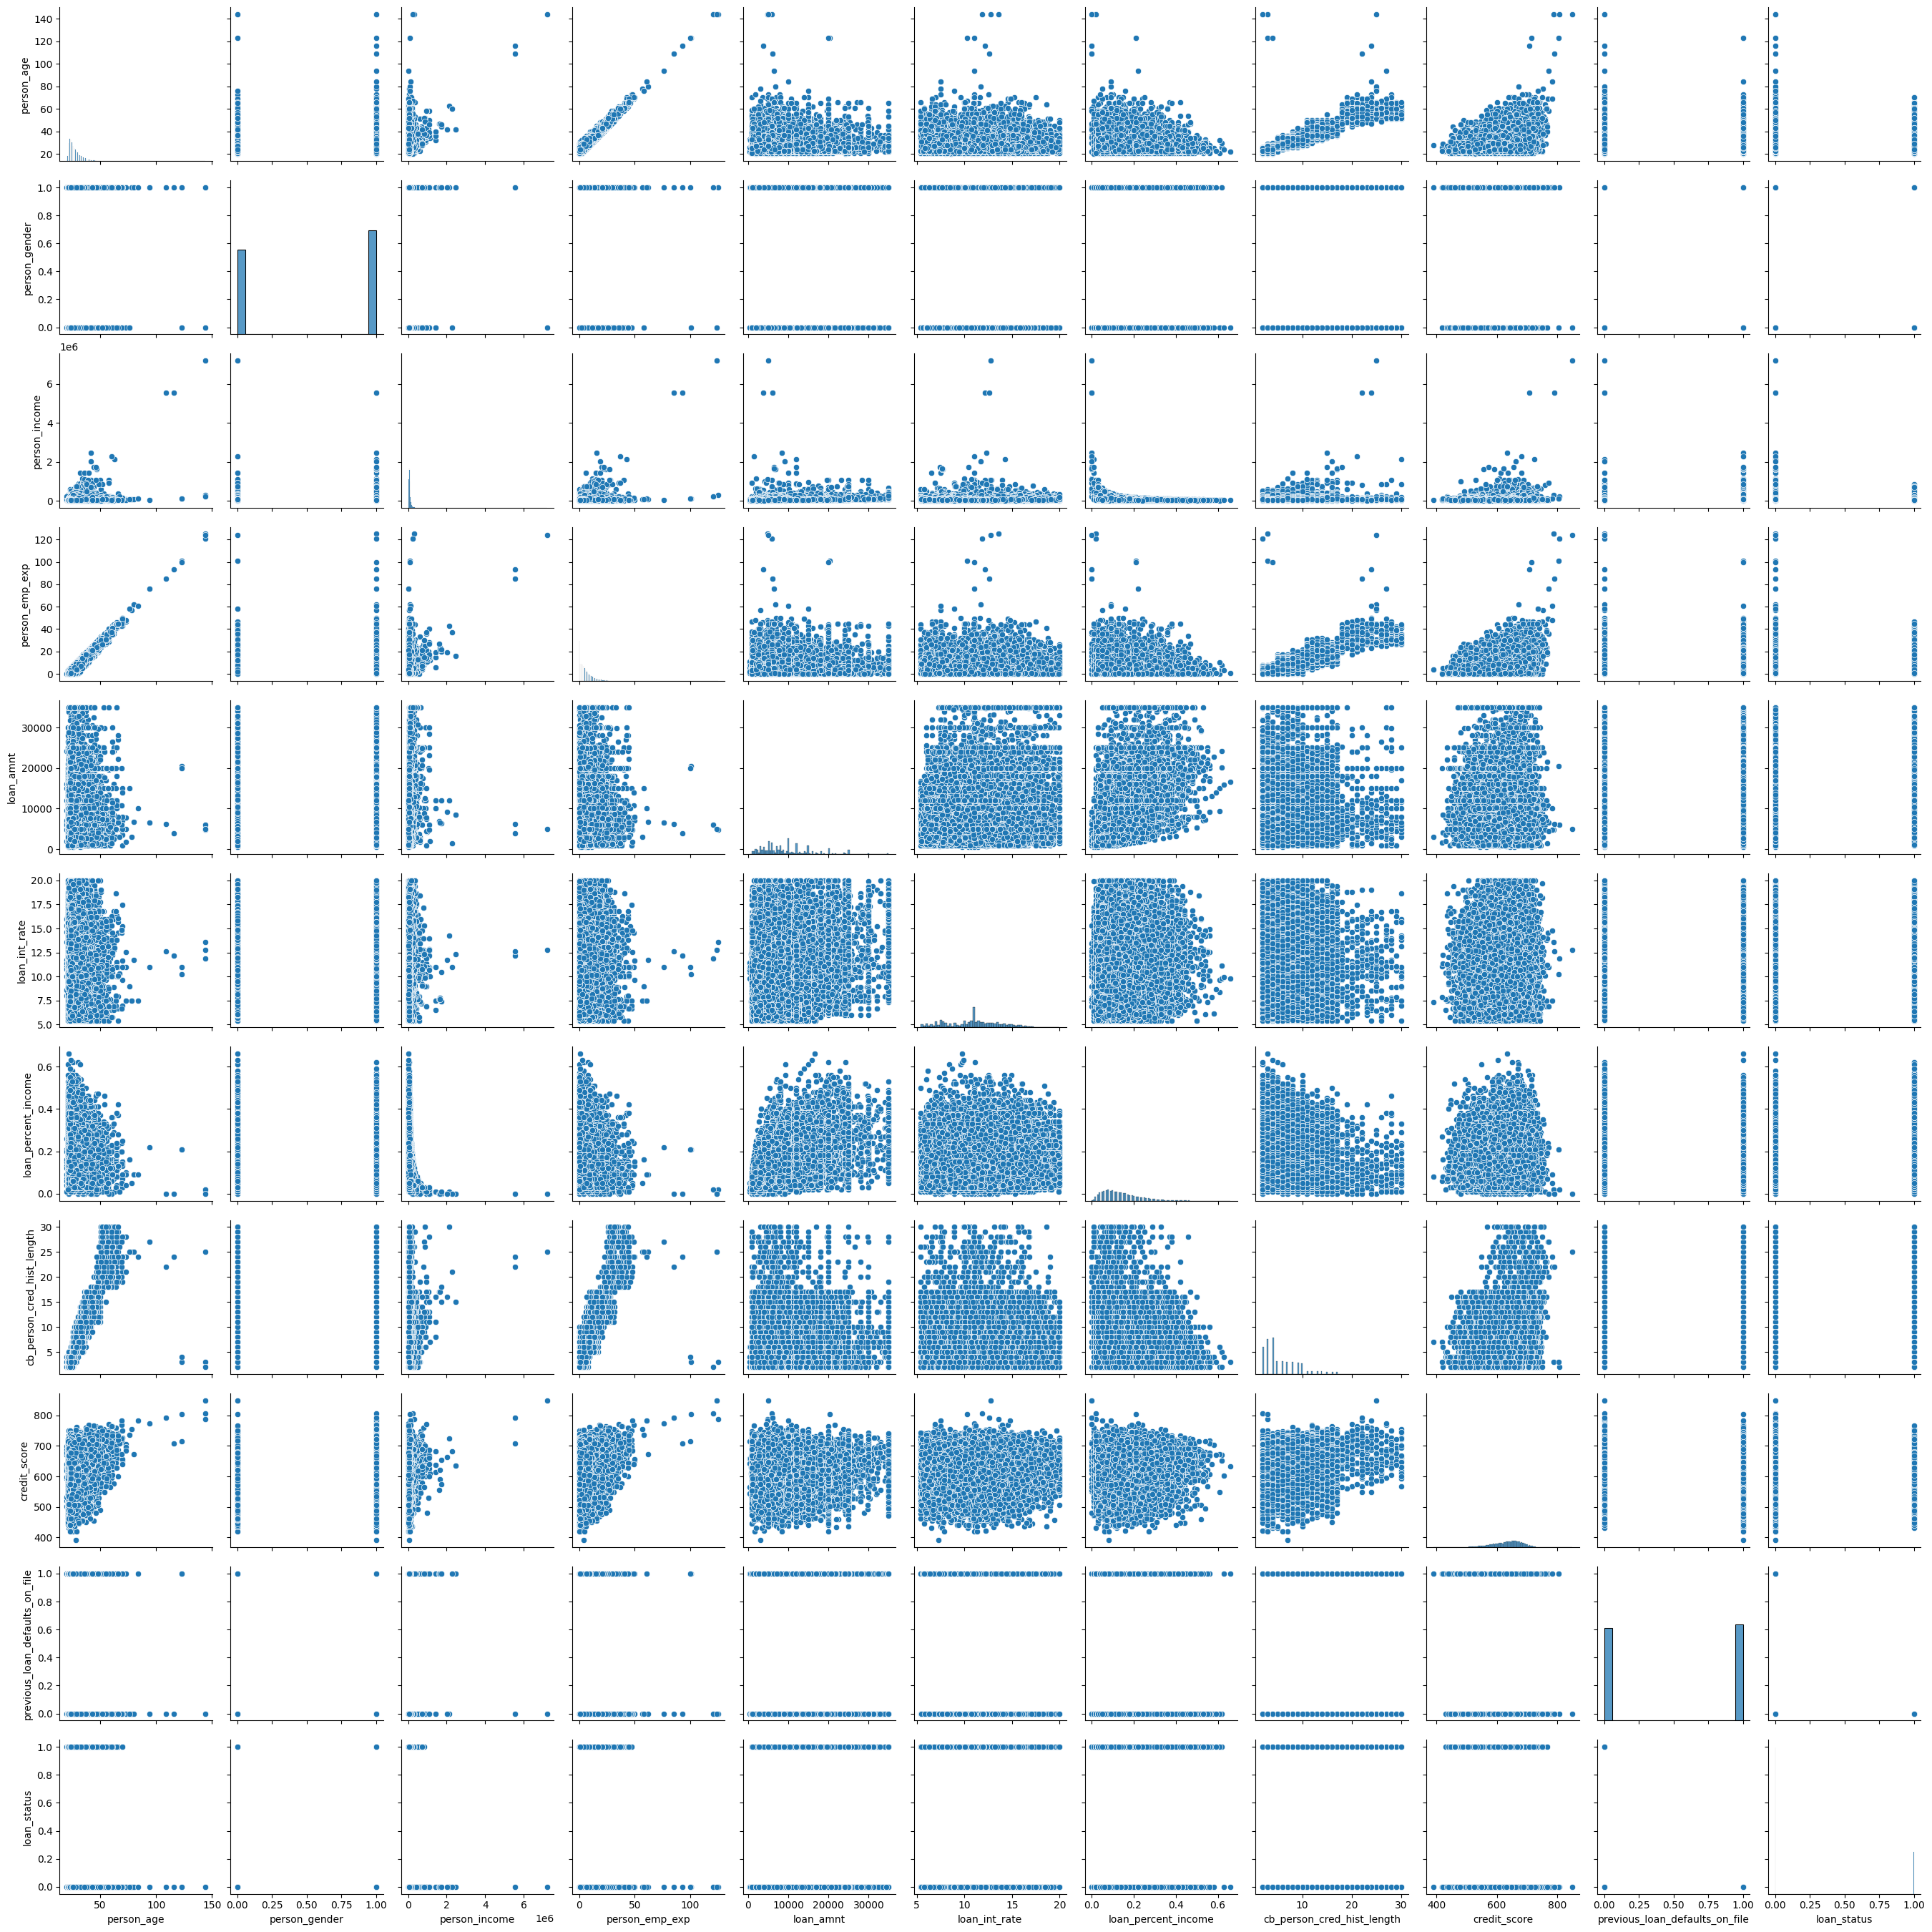

In [13]:
sns.pairplot(df)

In [14]:
dv=df[['person_gender', 'credit_score', 'loan_percent_income', 'loan_int_rate', 'previous_loan_defaults_on_file',
       'person_income', 'loan_status']]
dv.corr()

,person_gender,credit_score,loan_percent_income,loan_int_rate,previous_loan_defaults_on_file,person_income,loan_status
person_gender,1.000000,-0.000223,-0.000367,0.003662,0.000704,0.010173,-0.000561
credit_score,-0.000223,1.000000,-0.011483,0.011498,-0.183005,0.035919,-0.007647
loan_percent_income,-0.000367,-0.011483,1.000000,0.125209,-0.203252,-0.234177,0.384880
loan_int_rate,0.003662,0.011498,0.125209,1.000000,-0.181800,0.001510,0.332005
previous_loan_defaults_on_file,0.000704,-0.183005,-0.203252,-0.181800,1.000000,0.061483,-0.543096
person_income,0.010173,0.035919,-0.234177,0.001510,0.061483,1.000000,-0.135808
loan_status,-0.000561,-0.007647,0.384880,0.332005,-0.543096,-0.135808,1.000000


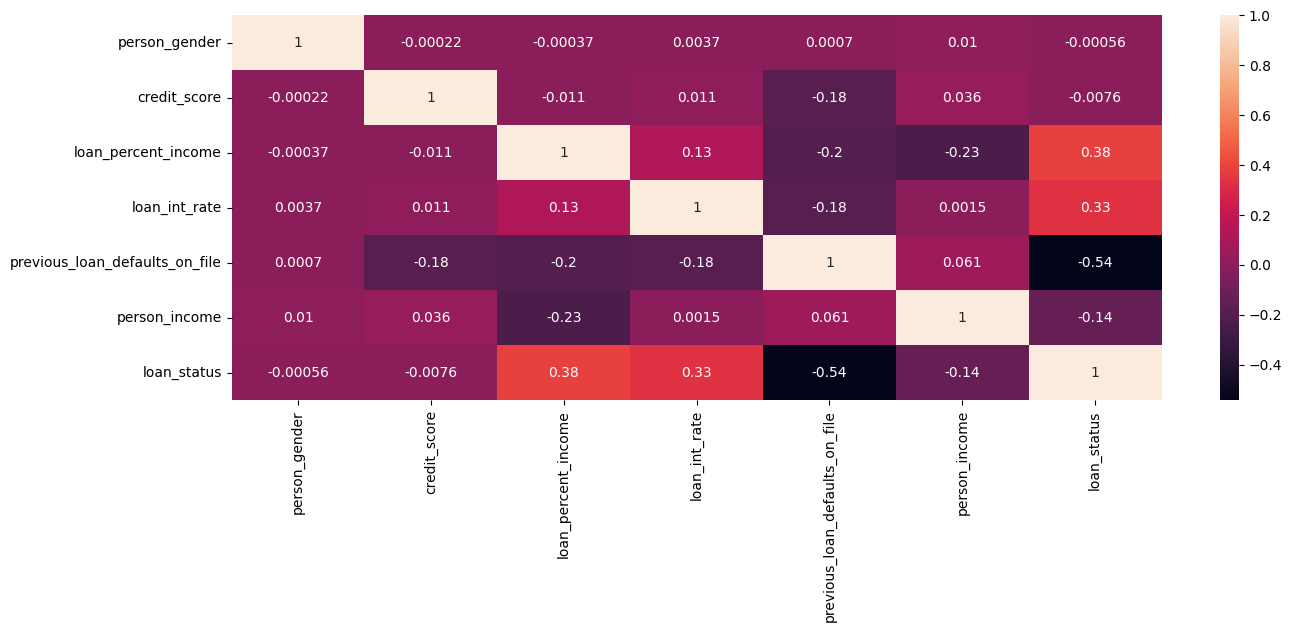

In [15]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(dv.corr(),annot=True)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [17]:
# Machine learning
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [18]:
features= ['credit_score', 'loan_percent_income', 'loan_int_rate', 'previous_loan_defaults_on_file', 'person_income']

In [19]:
X= df[features]
Y= df['loan_status']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42, stratify= Y)   # very important for imbalanced data

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [22]:
svc = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',       
    random_state=42
)

In [23]:
# Train
svc_model=svc.fit(X_train_scaled, Y_train)
svc_model

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [24]:
Y_pred = svc.predict(X_test_scaled)

In [25]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) # Test Accuracy
svc_accuracy

84.79

In [26]:
print("Accuracy: {:.3f}\n".format(accuracy_score(Y_test, Y_pred)))
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.848

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7000
           1       0.60      0.93      0.73      2000

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.81      9000
weighted avg       0.89      0.85      0.86      9000

Confusion Matrix:
[[5765 1235]
 [ 134 1866]]


In [27]:
import pickle

# Assuming you have:
# - svc_model = your trained SVC
# - scaler    = your fitted StandardScaler (very important!)
# - features  = list of column names you used for training (optional but recommended)

package = {
    'model': svc_model,
    'scaler': scaler,                    
    'features': ['credit_score', 'loan_percent_income', 'loan_int_rate', 
                 'previous_loan_defaults_on_file', 'person_income'],              
    # 'model_type': 'SVC_rbf',
    # 'trained_on': 'loan_approval_dataset',
    # 'date_trained': '2026-01-11'
}

# Save everything in one file
with open('loan_approval_svc_model.pickle', 'wb') as f:
    pickle.dump(package, f)

print("Model + Scaler saved successfully!")

Model + Scaler saved successfully!
